# 0. 설정

In [ ]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집

- 캘리포니아 부동산 업자에게 의뢰를 받았다고 가정
- 결과 데이터 존재하기에 지도학습 모델 사용
- 결과 데이터는 집값 수치형 데이터이기에 회귀 모델 사용

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
# 파일은 코랩 환경에서 다운받아서 압축 해제
fetch_housing_data()

In [ ]:
# 압축 해제된 csv 파일을 판다스 데이터프레임 객체에 담기.
housing = load_housing_data()

#2. 점검 및 탐색

## 데이터 탐색

In [ ]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- longitude: 경도 
- latitude: 위도
- housing_median_age: 주택이 지어진 기간(중앙값)
- total_bedrooms: 전체 방의 개수
- total_bedrooms: 전체 침실 개수
- population: 인구 수
- households: 세대 수
- median_income: 중간 소득
- median_house_value: 중간 주택 가격
- ocean_proximity: 바다 접근도

In [ ]:
# 데이터탐색 방법: head(), tail()
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
housing.tail(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND
20624,-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,INLAND
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


In [ ]:
# 데이터 요약 자료를 전체 한눈에 확인하기: info()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 데이터의 통계 자료 확인하기: describe()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# 특정 칼럼의 데이터 카테고리별 값 세기: value_counts(), 범주형 데이터에 주로 사용
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## 시각화

- seaborn 시각화 자료: https://seaborn.pydata.org/examples/index.html
- 예제 블로그: https://coding-kindergarten.tistory.com/133?category=1003348

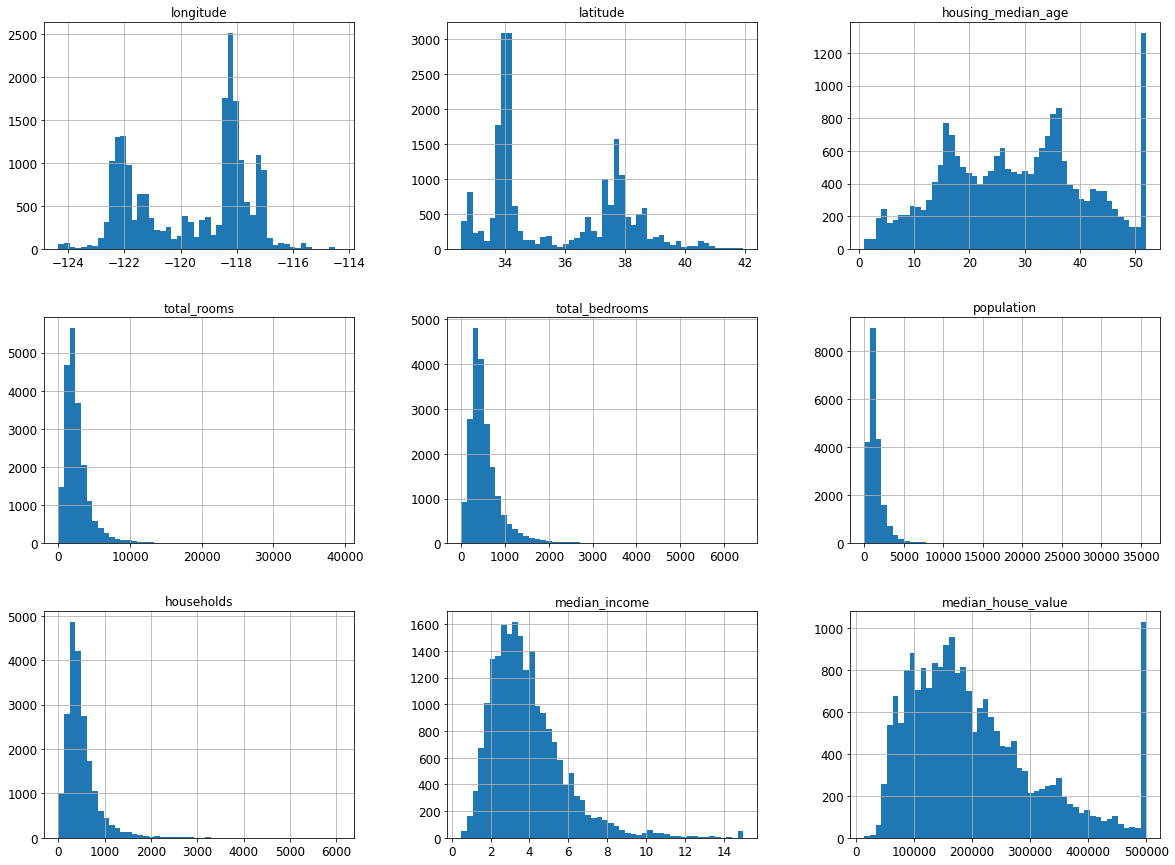

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

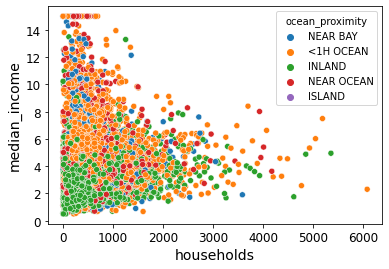

In [ ]:
sns.scatterplot(data = housing, x = 'longitude', y = 'latitude', hue = 'ocean_proximity')

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

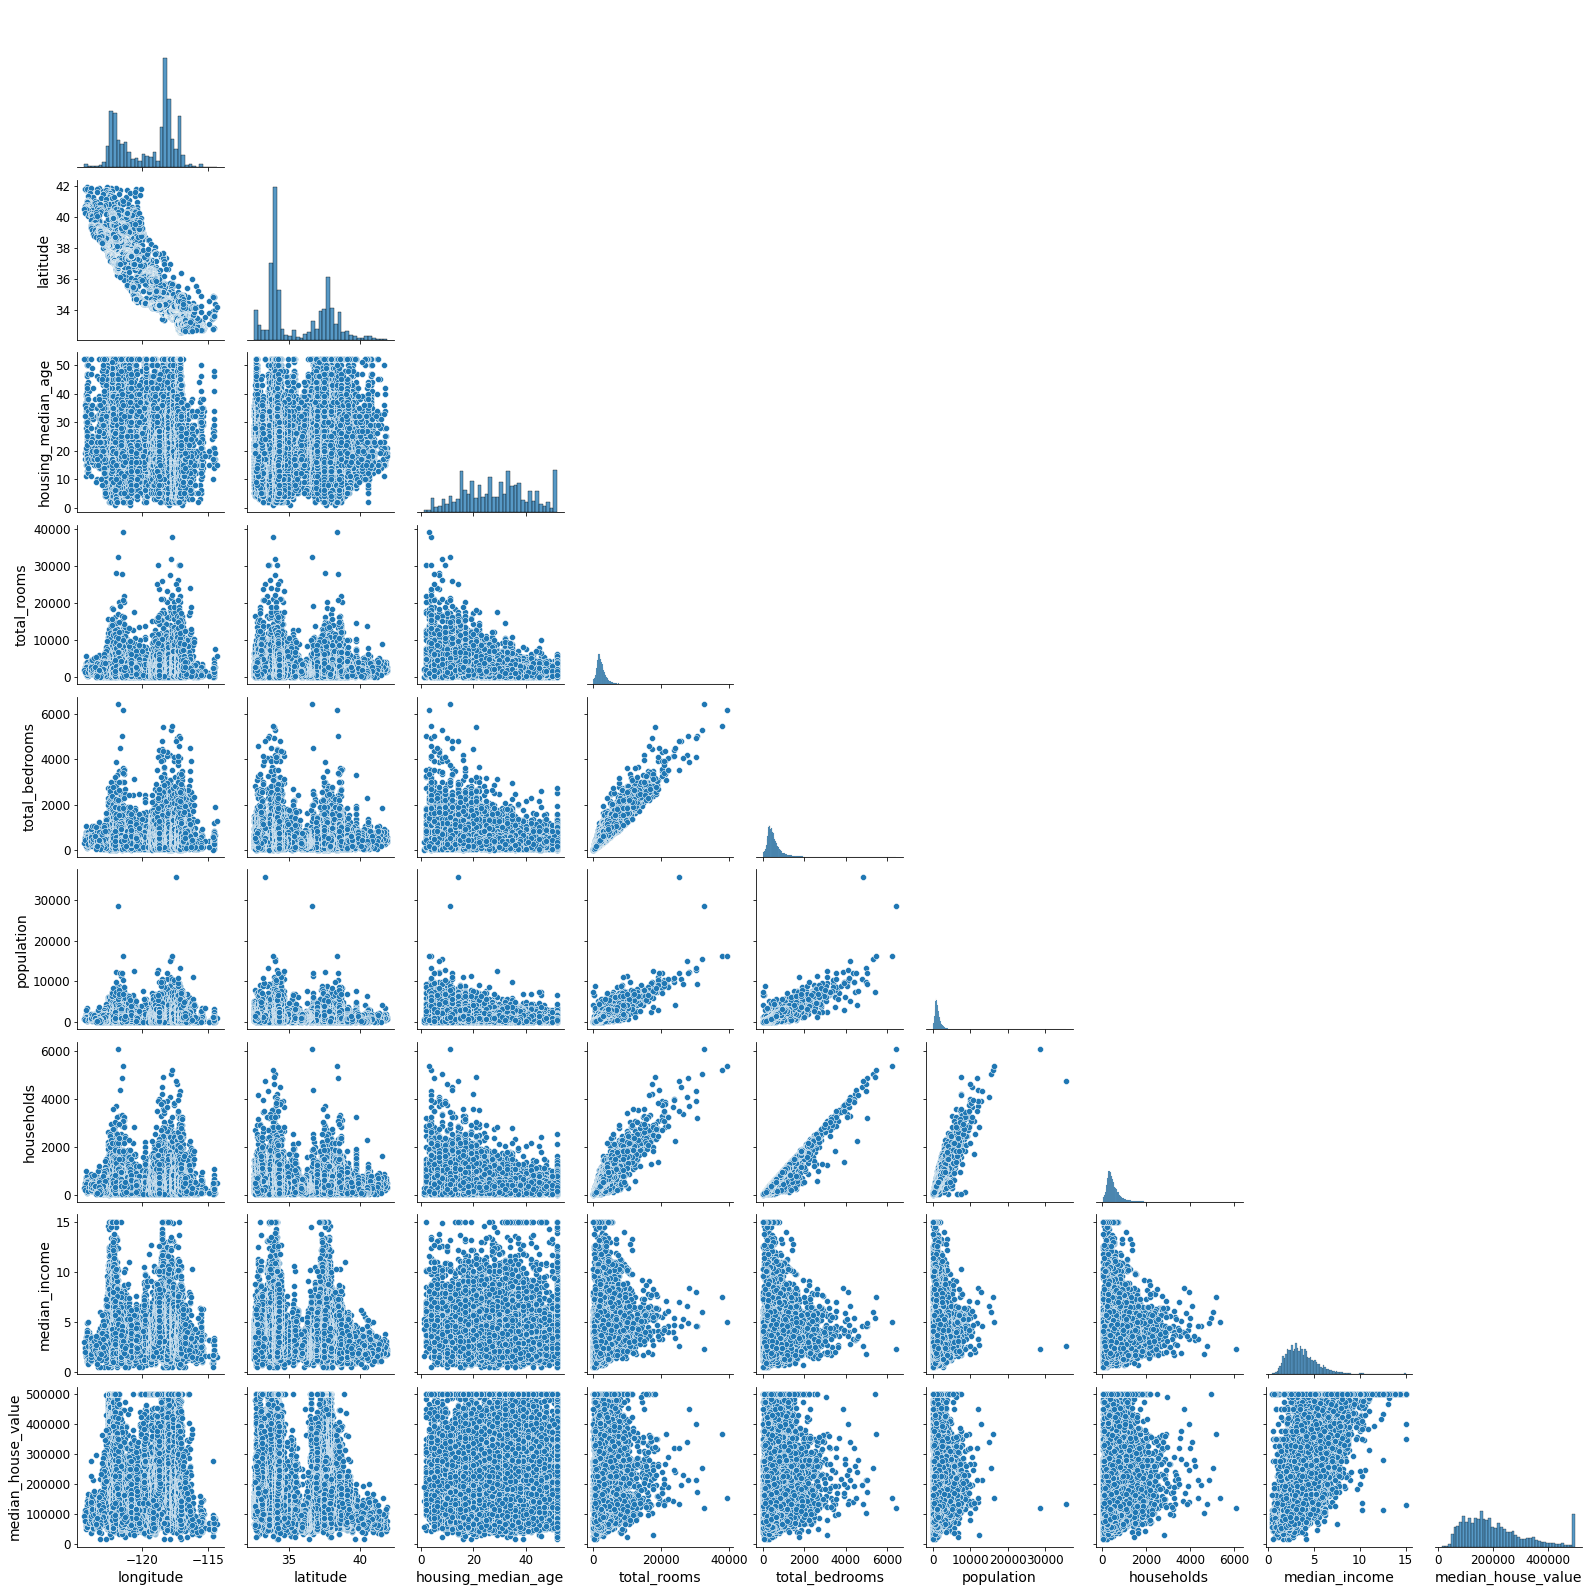

In [ ]:
# 산점도와 히스토그램을 같이 확인하고 싶을 때: pairplot(data, corner = True)
plt.figure(figsize=(20,20))
sns.pairplot(housing, corner = True)

피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [ ]:
# 상관분석: 
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
corr_matrix = housing.corr()
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**cmap 관련 예제**
- 참고 자료: https://wikidocs.net/141538

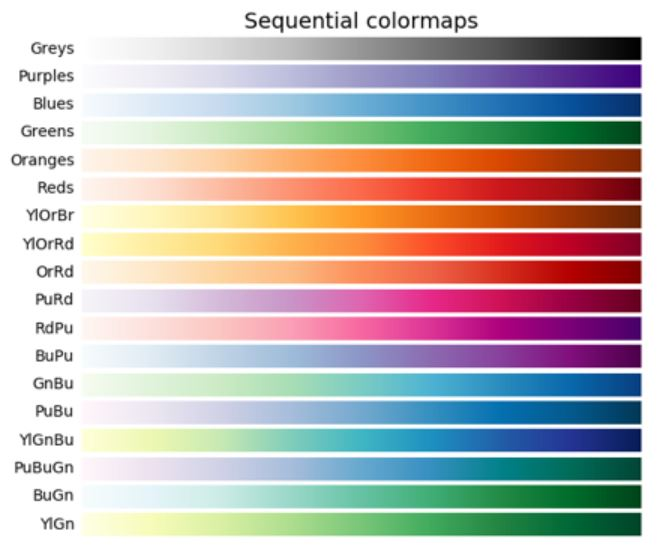

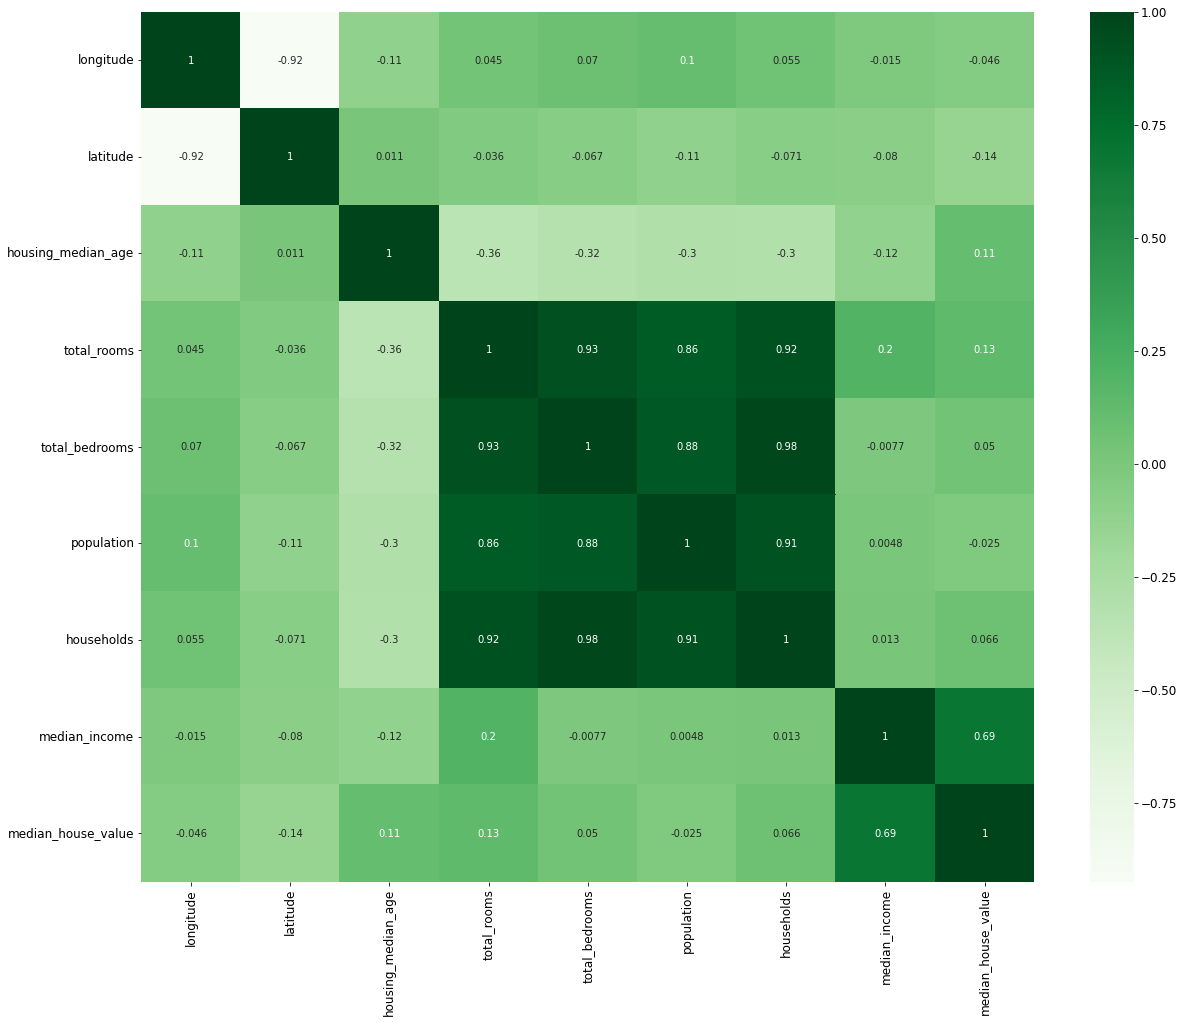

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot = True, cmap='Greens')

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot = True, cmap='seismic')

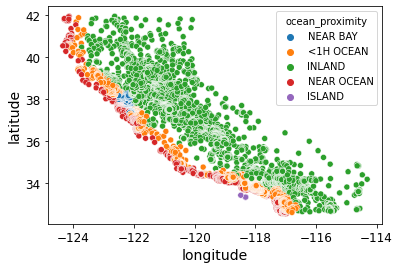

In [ ]:
sns.scatterplot(data = housing, x = 'longitude', y = 'latitude', hue = 'ocean_proximity')

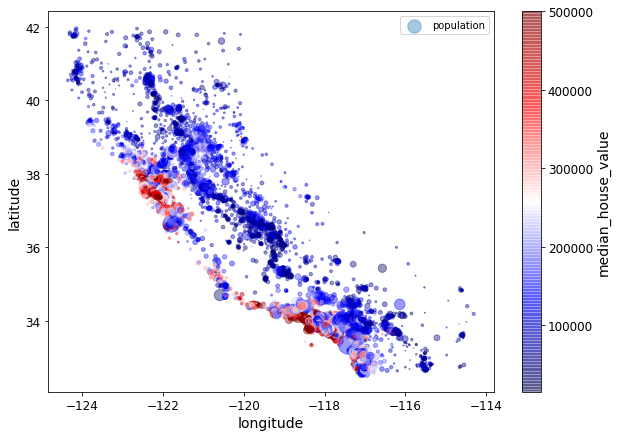

In [ ]:
# 위도 경도를 통한 지도 위치 확인과 인구 밀집도 확인, 산점도 사용
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap='seismic', colorbar=True,
            sharex=False)
plt.legend()

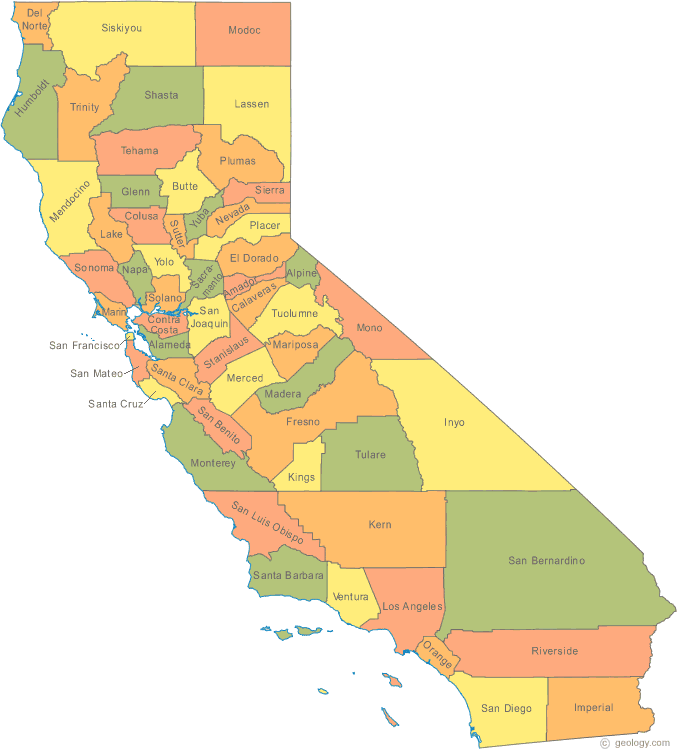

#3. 전처리 및 정제

In [ ]:
housing.isnull().any(axis=0)

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
# 결측치 처리
sample = housing[housing.isnull().any(axis=1)].head()

In [ ]:
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [ ]:
# 결측치 처리 옵션1: EDA 결과 해당 칼럼은 반드시 필요하다.
df1 = housing.copy()
df1.dropna(subset=["total_bedrooms"], axis = 0)

In [ ]:
# 결측치 처리 옵션2: 데이터 탐색 결과 해당 칼럼은 필요 없을 것 같다.
df1.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.dropna(subset=["total_bedrooms"], inplace = True)

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# 결측치 처리 옵션3: 군집화를 이용한 카테고리 분류
# X

In [ ]:
# 이상값
# 상위 1%의 급여를 이상치로 처리해야할까? 회사 급여 관련 데이터를 다룰때 CEO의 급여는 포함되어야하는가?
# 삶의 만족도 예측 모델, 직장인 차종 예측 모델

In [ ]:
# 노이즈 데이터
# X

# 데이터 통합
# X

In [ ]:
# 범주형 데이터 - 문자열 처리
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [ ]:
# OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:20]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [ ]:
housing["ocean_proximity"] = housing_cat_encoded
housing["ocean_proximity"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
20635    1.0
20636    1.0
20637    1.0
20638    1.0
20639    1.0
Name: ocean_proximity, Length: 20433, dtype: float64

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0


In [ ]:
# 인코딩된 카테고리의 원본 데이터 확인: categories_
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,0.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,1.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,1.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,0.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,4.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,0.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,0.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,0.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,3.0


In [ ]:
# 훈련, 테스트 데이터셋를 분리한 후 X,Y 분리.
# housing = train_set.drop("median_house_value", axis=1) 
# housing_labels = train_set["median_house_value"].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( train_set.drop("median_house_value", axis=1), train_set["median_house_value"].copy() , test_size=0.2, random_state=42)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5724,-118.26,34.18,32.0,14556.0,2077.0,5459.0,2017.0,8.1657,0.0
7491,-118.23,33.92,32.0,2698.0,640.0,1953.0,613.0,1.2222,0.0
18036,-121.91,37.23,22.0,2614.0,453.0,1240.0,462.0,6.0712,0.0
2047,-119.72,36.72,15.0,1713.0,246.0,766.0,232.0,6.8162,1.0
16145,-122.47,37.78,52.0,2169.0,522.0,1220.0,505.0,3.1989,3.0
...,...,...,...,...,...,...,...,...,...
5242,-118.40,34.11,32.0,5578.0,753.0,1567.0,697.0,15.0001,0.0
6252,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,0.0
14087,-117.09,32.76,44.0,1139.0,214.0,470.0,217.0,3.5481,4.0
6602,-118.16,34.19,42.0,2076.0,462.0,1641.0,436.0,2.2326,0.0


#4. 모델링 및 훈련

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#5. 평가

In [ ]:
# MSE, RMSE
from sklearn.metrics import mean_squared_error

y_pred = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

48673.94789974826

In [ ]:
# MAE, RMAE

##결과 시각화

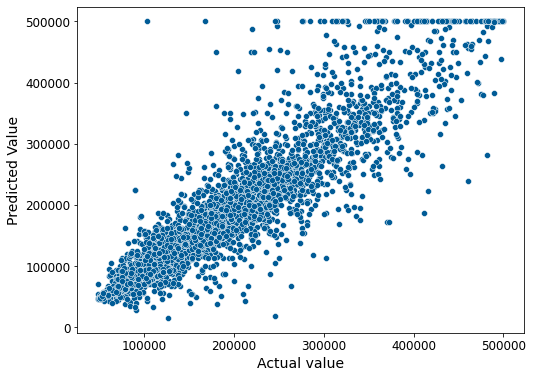

In [ ]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x= y_pred, y= y_test, color= '#005b96')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.show()

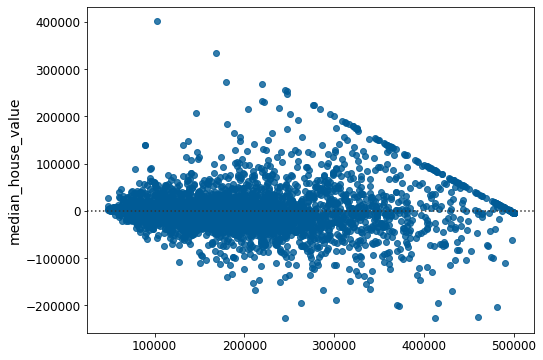

In [ ]:
plt.figure(figsize= (8, 6))
sns.residplot(x= y_pred, y = y_test, color= '#005b96')
plt.show()

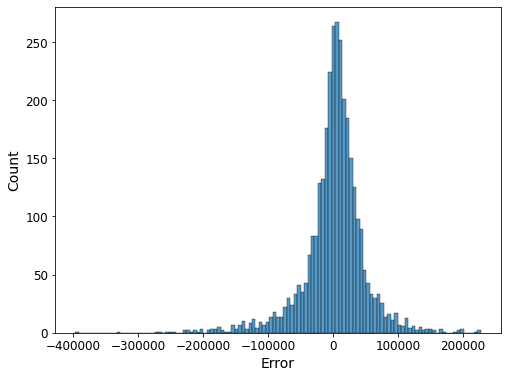

In [ ]:
resid = y_pred - y_test
plt.figure(figsize= (8, 6))
sns.histplot(resid)
plt.xlabel('Error');

#6. 배포

In [ ]:
#my_model = model or

import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF